In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [108]:
df = pd.read_csv('curated_with_decay.csv')
print(len(df))

2448960


In [109]:
iso_list = ['cs-137', 'cs-134', 'ce-144', 'ru-106', 'eu-154']
import copy
from pyne import material
from pyne import nucname

x = np.zeros((len(df), len(iso_list)))
for i in range(len(df)):
    q = dict(df.iloc[i])
    q = {k:v for k,v in q.items() if k in iso_list}
    mat = material.Material(q).activity()
    mat = {nucname.serpent(k).lower():v for k,v in mat.items()}
    x[i] = [mat[e] for e in iso_list]
    
norm_iso_list = iso_list[1:]
for indx, val in enumerate(norm_iso_list):
    t = x[:, indx+1] / x[:, 0]
    df[val+'_norm_activity'] = t
list(df)




['Unnamed: 0',
 'ac-227',
 'ag-108m',
 'ag-110m',
 'am-241',
 'am-242m',
 'am-243',
 'bu',
 'c-14',
 'ce-144',
 'cf-249',
 'cf-251',
 'cm-242',
 'cm-243',
 'cm-244',
 'cm-245',
 'cm-246',
 'cm-247',
 'cm-248',
 'cooling_time',
 'cs-134',
 'cs-135',
 'cs-137',
 'eu-152',
 'eu-154',
 'eu-155',
 'evaluation_date',
 'h-3',
 'i-129',
 'init_enr',
 'kr-85',
 'nb-94',
 'nb-95',
 'np-237',
 'other',
 'pa-231',
 'pd-107',
 'pm-147',
 'pu-238',
 'pu-239',
 'pu-240',
 'pu-241',
 'pu-242',
 'pu-244',
 'ra-226',
 'reactor_type',
 'ru-103',
 'ru-106',
 'sb-124',
 'sb-125',
 'se-79',
 'sm-151',
 'sn-126',
 'sr-90',
 'tc-99',
 'th-229',
 'th-230',
 'th-232',
 'total_mass',
 'u-232',
 'u-233',
 'u-234',
 'u-235',
 'u-236',
 'u-238',
 'y-90',
 'zr-93',
 'zr-95',
 'cs-134_norm_activity',
 'ce-144_norm_activity',
 'ru-106_norm_activity',
 'eu-154_norm_activity']

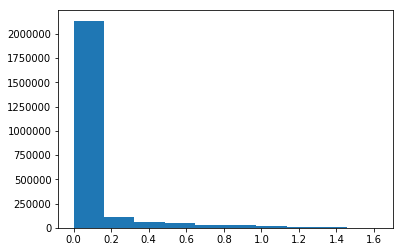

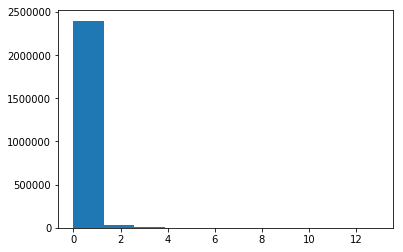

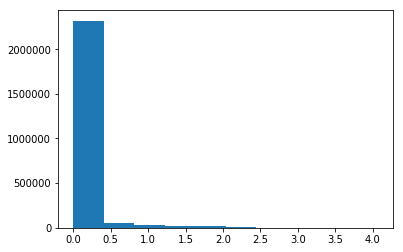

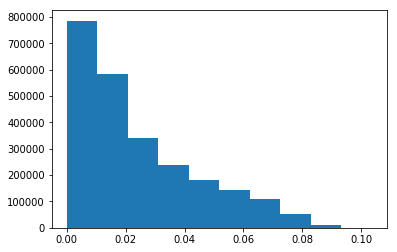

In [110]:
for i in list(df):
    if 'activity' in i:
        plt.hist(df[i])
        plt.show()
        plt.close()

In [111]:
df.to_csv('./curated_with_norm_activity.csv')

In [102]:
from pyne import material
from pyne import nucname
q = np.zeros(x.shape)
for i in range(len(q)):
    t = {k:v for k,v in zip(iso_list, x[i,:])}
    mat = material.Material(t).activity()
    mat = {nucname.serpent(k).lower():v for k,v in mat.items()}
    q[i] = [mat[e] for e in iso_list]

In [83]:
print(iso_list)
for indx, val in enumerate(iso_list):
    df[val+'_activity'] = q[:, indx]

['cs-134', 'ce-144', 'ru-106', 'eu-154']


In [84]:
list(df)

['Unnamed: 0',
 'ac-227',
 'ag-108m',
 'ag-110m',
 'am-241',
 'am-242m',
 'am-243',
 'bu',
 'c-14',
 'ce-144',
 'cf-249',
 'cf-251',
 'cm-242',
 'cm-243',
 'cm-244',
 'cm-245',
 'cm-246',
 'cm-247',
 'cm-248',
 'cooling_time',
 'cs-134',
 'cs-135',
 'cs-137',
 'eu-152',
 'eu-154',
 'eu-155',
 'evaluation_date',
 'h-3',
 'i-129',
 'init_enr',
 'kr-85',
 'nb-94',
 'nb-95',
 'np-237',
 'other',
 'pa-231',
 'pd-107',
 'pm-147',
 'pu-238',
 'pu-239',
 'pu-240',
 'pu-241',
 'pu-242',
 'pu-244',
 'ra-226',
 'reactor_type',
 'ru-103',
 'ru-106',
 'sb-124',
 'sb-125',
 'se-79',
 'sm-151',
 'sn-126',
 'sr-90',
 'tc-99',
 'th-229',
 'th-230',
 'th-232',
 'total_mass',
 'u-232',
 'u-233',
 'u-234',
 'u-235',
 'u-236',
 'u-238',
 'y-90',
 'zr-93',
 'zr-95',
 'cs-134_activity',
 'ce-144_activity',
 'ru-106_activity',
 'eu-154_activity']

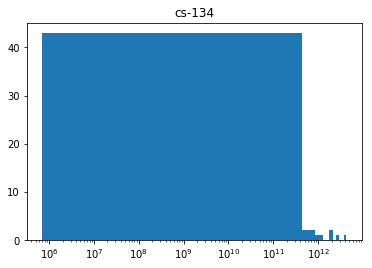

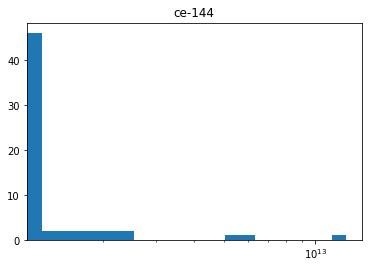

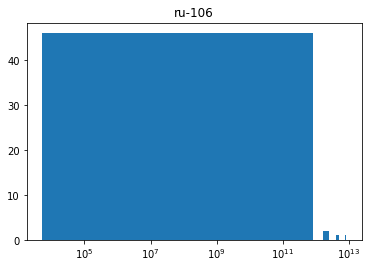

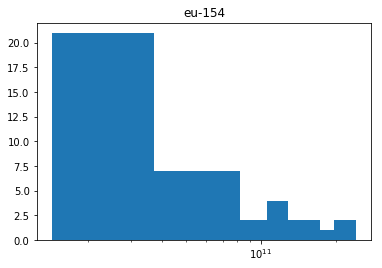

In [88]:
for i in iso_list:
    plt.hist(df[i+'_activity'])
    plt.xscale('log')
    plt.title(i)
    plt.show()
    plt.close()

In [31]:
x = np.zeros(10)
y = np.zeros(10)
for i in range(10):
    x[i] = df.iloc[i]['cooling_time']
    y[i] = df.iloc[i]['ce-144']

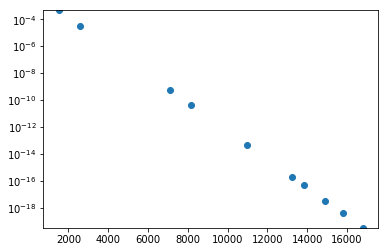

In [32]:
plt.scatter(x,y)
plt.ylim(min(y), max(y))
plt.yscale('log')